# WeatherPy
----

#### Note
* Extremely excited i figured out how this text box works 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units=imperial&q="

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found.")
print("---\nData Retrieval Complete\n---")

Processing Record 1 of Set 1 | barrow
Processing Record 2 of Set 1 | vao
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | rikitea
City not found.
Processing Record 6 of Set 1 | coronini
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | hue
Processing Record 9 of Set 1 | shingu
Processing Record 10 of Set 1 | tasiilaq
City not found.
Processing Record 11 of Set 1 | marondera
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | nanortalik
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | buritizeiro
Processing Record 17 of Set 1 | rabak
Processing Record 18 of Set 1 | yellowknife
City not found.
Processing Record 19 of Set 1 | albany
City not found.
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | provideniya
Processing Record 22 of Set 1 | northam
Processing Record 23 of Set 1 | moses lake
Proc

Processing Record 42 of Set 4 | lavrentiya
Processing Record 43 of Set 4 | barrington
Processing Record 44 of Set 4 | ugoofaaru
Processing Record 45 of Set 4 | tual
Processing Record 46 of Set 4 | east london
City not found.
City not found.
Processing Record 47 of Set 4 | lhokseumawe
City not found.
Processing Record 48 of Set 4 | yerbogachen
City not found.
Processing Record 49 of Set 4 | bethel
Processing Record 1 of Set 5 | alice springs
Processing Record 2 of Set 5 | necochea
Processing Record 3 of Set 5 | pervomaysk
Processing Record 4 of Set 5 | srednekolymsk
Processing Record 5 of Set 5 | puerto padre
Processing Record 6 of Set 5 | starobaltachevo
Processing Record 7 of Set 5 | petropavlovsk-kamchatskiy
Processing Record 8 of Set 5 | obo
Processing Record 9 of Set 5 | povenets
Processing Record 10 of Set 5 | khatanga
Processing Record 11 of Set 5 | tombouctou
Processing Record 12 of Set 5 | carnot
Processing Record 13 of Set 5 | zambezi
Processing Record 14 of Set 5 | kon tum
Pr

Processing Record 36 of Set 8 | port hedland
Processing Record 37 of Set 8 | buluang
Processing Record 38 of Set 8 | elista
City not found.
Processing Record 39 of Set 8 | oranjemund
Processing Record 40 of Set 8 | berdigestyakh
City not found.
Processing Record 41 of Set 8 | bambari
Processing Record 42 of Set 8 | yenagoa
Processing Record 43 of Set 8 | katsuura
Processing Record 44 of Set 8 | rosario
Processing Record 45 of Set 8 | yumen
Processing Record 46 of Set 8 | zalantun
Processing Record 47 of Set 8 | altay
City not found.
Processing Record 48 of Set 8 | paoua
Processing Record 49 of Set 8 | saint-augustin
City not found.
Processing Record 1 of Set 9 | saint-joseph
Processing Record 2 of Set 9 | santiago de cao
Processing Record 3 of Set 9 | caconda
City not found.
City not found.
Processing Record 4 of Set 9 | castrillon
Processing Record 5 of Set 9 | santa vitoria do palmar
Processing Record 6 of Set 9 | kaliganj
Processing Record 7 of Set 9 | caravelas
Processing Record 8 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

In [5]:
# establish dataframe
weather_dataframe = pd.DataFrame(weather_dict)
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,barrow,0,AR,1562999841,75,-38.31,-60.23,41.27,4.90
1,vao,89,EE,1562999842,61,59.10,26.19,59.81,5.82
2,ribeira grande,20,PT,1562999842,82,41.76,-8.56,72.00,3.36
3,hermanus,0,ZA,1562999842,97,-34.42,19.24,50.00,1.99
4,rikitea,56,PF,1562999843,81,-23.12,-134.97,74.03,11.43


In [6]:
# output data to csv
weather_dataframe.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

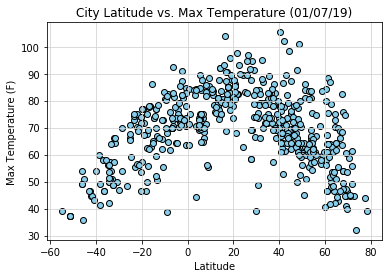

In [8]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig1.png")
plt.show()

#### Latitude vs. Humidity Plot

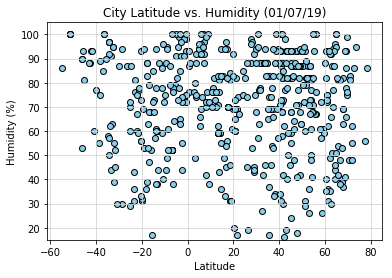

In [9]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

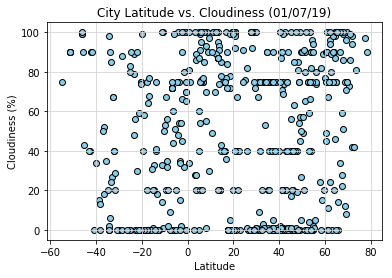

In [10]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

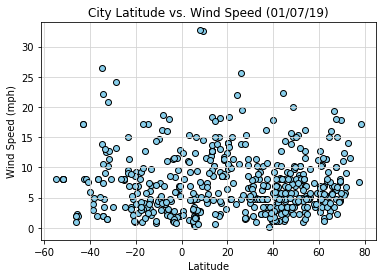

In [11]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig4.png")
plt.show()